<span id="hello-world" />

# 안녕 세상



<details>
  <summary><b>패키지 버전</b></summary>

  이 페이지의 코드는 다음 요구 사항을 사용하여 개발되었습니다.
  다음 버전 이상을 사용하는 것이 좋습니다.

  ```
  qiskit[all]~=2.1.1
  qiskit-ibm-runtime~=0.40.1
  ```
</details>



이 예제에는 두 부분이 포함되어 있습니다. 먼저 간단한 양자 프로그램을 만들어 양자 처리 장치(QPU)에서 실행합니다.  실제 양자 연구에는 훨씬 더 강력한 프로그램이 필요하므로 두 번째 섹션 ([많은 수의 큐비트로 확장](#scale-to-large-numbers-of-qubits) )에서는 간단한 프로그램을 유틸리티 수준까지 확장합니다.



<span id="install-and-authenticate" />

## 설치 및 인증

1.  아직 키스킷을 설치하지 않았다면 [빠른 시작](/docs/guides/quick-start) 가이드에서 지침을 확인하세요.

    *   퀀텀 하드웨어에서 작업을 실행하려면 Qiskit Runtime 을 설치하세요:

        ```bash
        pip install qiskit-ibm-runtime
        ```

    *   로컬에서 Jupyter 노트북을 실행할 환경을 설정하세요:

        ```bash
        pip install jupyter
        ```

2.  무료 [오픈 요금제를](/docs/guides/plans-overview#open-plan) 통해 양자 하드웨어에 액세스하기 위한 인증을 설정하세요.

    (계정 가입 초대를 이메일로 받은 경우에는 [초대받은 사용자를 위한 단계를](/docs/guides/cloud-setup-invited) 따르세요.)

    *   로 이동하여 [IBM Quantum Platform](/) 로 이동하여 로그인하거나 계정을 만드세요.

    *   [대시보드에서](/) API 키( *API 토큰이라고도* 함)를 생성한 다음 안전한 위치에 복사합니다.

    *   [인스턴스](/instances) 페이지로 이동하여 사용하려는 인스턴스를 찾습니다. CRN 위로 마우스를 가져가서 클릭하여 복사합니다.

    *   이 코드를 사용하여 자격 증명을 로컬에 저장하세요:

        ```python
        from qiskit_ibm_runtime import QiskitRuntimeService

        QiskitRuntimeService.save_account(
        token="<your-api-key>", # Use the 44-character API_KEY you created and saved from the IBM Quantum Platform Home dashboard
        instance="<CRN>", # Optional
        )
        ```

3.  이제 Qiskit Runtime 서비스에 인증하고 싶을 때 언제든지 이 Python 코드를 사용할 수 있습니다:
    ```python
        from qiskit_ibm_runtime import QiskitRuntimeService

        # Run every time you need the service
        service = QiskitRuntimeService()
    ```

<Admonition type="info" title="신뢰할 수 있는 Python 환경을 사용하지 않으시나요?">
  공용 컴퓨터나 기타 보안되지 않은 환경을 사용하는 경우 인증 자격 증명을 안전하게 유지하려면 [수동 인증 지침을](/docs/guides/cloud-setup-untrusted) 따르세요.
</Admonition>



<span id="create-and-run-a-simple-quantum-program" />

## 간단한 양자 프로그램 생성 및 실행



키스킷 패턴을 사용하여 양자 프로그램을 작성하는 네 가지 단계는 다음과 같습니다:

1.  문제를 퀀텀 네이티브 형식으로 매핑하세요.

2.  회로와 연산자를 최적화하세요.

3.  양자 프리미티브 함수를 사용하여 실행합니다.

4.  결과를 분석하십시오.

<span id="step-1-map-the-problem-to-a-quantum-native-format" />

### 1단계. 문제를 퀀텀 네이티브 형식으로 매핑하기

양자 프로그램에서 양자 *회로는* 양자 명령을 표현하는 기본 형식이며, *연산자는* 측정할 관측값을 나타냅니다. 회로를 만들 때는 일반적으로 새 객체를 만든 다음 [`QuantumCircuit`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit-class) 객체를 생성한 다음 순차적으로 인스트럭션을 추가합니다.



다음 코드 셀은 두 큐비트가 서로 완전히 얽혀 있는 상태인 *벨 상태를* 생성하는 회로를 생성합니다.

<Admonition type="note" title="참고: 비트 순서">
  Qiskit SDK는 LSb 0 비트 번호를 사용하며, 여기서 $n^{th}$ 숫자는 $1 \ll n$ 또는 $2^n$ 값을 가집니다. 자세한 내용은 [Qiskit SDK 항목의 비트 순서를](/docs/guides/bit-ordering) 참조하세요.
</Admonition>



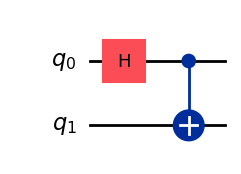

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")

문서에서 [`QuantumCircuit`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit-class) 문서에서 사용 가능한 모든 작업을 확인하세요.



양자 회로를 만들 때는 실행 후 어떤 유형의 데이터를 반환할지도 고려해야 합니다. 키스킷은 데이터를 반환하는 두 가지 방법을 제공합니다. 측정하기로 선택한 큐비트 집합에 대한 확률 분포를 구하거나 관측 가능성의 기대값을 구할 수 있습니다. [키스킷 프리미티브](/docs/guides/get-started-with-primitives) ( [3단계에서](#step-3-execute-using-the-quantum-primitives) 자세히 설명)를 사용하여 이 두 가지 방법 중 하나로 회로를 측정할 수 있도록 워크로드를 준비합니다.

이 예에서는 연산자(양자 상태를 변화시키는 동작이나 과정을 나타내는 데 사용되는 수학적 객체)를 사용하여 지정된 `qiskit.quantum_info` 서브모듈을 사용하여 기대값을 측정합니다. 다음 코드 셀은 6개의 2큐비트 폴리 연산자를 생성합니다: `IZ`, `IX`, `ZI`, `XI`, `ZZ`, `XX` 입니다.



In [3]:
# Set up six different observables.

observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

<Admonition type="note" title="연산자 표기법">
  여기서 `ZZ` 연산자는 텐서 곱 $Z\otimes Z$ 의 줄임말로, 큐비트 1의 Z와 큐비트 0의 Z를 함께 측정하고 큐비트 1과 큐비트 0의 상관관계에 대한 정보를 얻는 것을 의미합니다. 이와 같은 기대값은 일반적으로 $\langle Z_1 Z_0 \rangle$ 로도 작성됩니다.

  상태가 얽힌 경우 $\langle Z_1 Z_0 \rangle$ 의 측정값은 $\langle I_1 \otimes Z_0 \rangle \langle Z_1 \otimes I_0 \rangle$ 의 측정값과 달라야 합니다. 위에서 설명한 회로에서 생성된 특정 얽힌 상태의 경우 $\langle Z_1 Z_0 \rangle$ 의 측정값은 1이 되어야 하고 $\langle I_1 \otimes Z_0 \rangle \langle Z_1 \otimes I_0 \rangle$ 의 측정값은 0이 되어야 합니다.
</Admonition>



<span id="optimize" />

<span id="step-2-optimize-the-circuits-and-operators" />

### 2단계. 회로 및 연산자 최적화

장치에서 회로를 실행할 때는 회로에 포함된 명령어 집합을 최적화하고 회로의 전체 깊이(대략적인 명령어 수)를 최소화하는 것이 중요합니다. 이렇게 하면 오류와 노이즈의 영향을 줄여 최상의 결과를 얻을 수 있습니다. 또한 회로의 명령어는 백엔드 디바이스의 명령어 [집합 아키텍처(ISA)](/docs/guides/transpile#instruction-set-architecture) 를 준수해야 하며 디바이스의 기본 게이트와 큐비트 연결을 고려해야 합니다.

다음 코드는 작업을 제출할 실제 장치를 인스턴스화하고 해당 백엔드의 ISA와 일치하도록 회로와 관측값을 변환합니다. [자격 증명을 이미 저장해 두어야](/docs/guides/cloud-setup) 합니다.



qiskit_runtime_service.__init__:WARNING:2026-01-04 15:48:14,987: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2026-01-04 15:48:15,592: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2026-01-04 15:48:17,697: Using instance: open-instance, plan: open


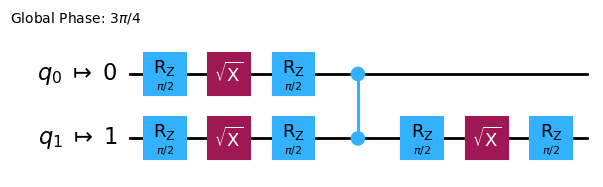

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

isa_circuit.draw("mpl", idle_wires=False)

<span id="step-3-execute-using-the-quantum-primitives" />

### 3단계. 양자 프리미티브를 사용하여 실행하기

양자 컴퓨터는 무작위 결과를 생성할 수 있으므로 일반적으로 회로를 여러 번 실행하여 출력의 샘플을 수집합니다. `Estimator` 클래스를 사용하여 관찰 가능한 값을 추정할 수 있습니다. `Estimator` 는 두 가지 [프리미티브](/docs/guides/get-started-with-primitives) 중 하나이며, 다른 하나는 `Sampler` 로 양자 컴퓨터에서 데이터를 가져오는 데 사용할 수 있습니다.  이러한 객체는 다음을 가지고 있습니다. `run()` [기본 통합 블록( PUB )을 사용하여 회로, 관측 가능 항목 및 매개변수(해당되는 경우)의 선택을 실행하는 방법입니다.](/docs/guides/primitives#sampler)



In [5]:
# Construct the Estimator instance.

estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d5d15tvp3tbc73avgs2g


작업이 제출된 후에는 현재 파이썬 인스턴스 내에서 작업이 완료될 때까지 기다리거나 `job_id` 을 사용하여 나중에 데이터를 검색할 수 있습니다.  (자세한 내용은 [작업 검색하기 섹션을](/docs/guides/monitor-job#retrieve-job-results-at-a-later-time) 참조하세요.)

작업이 완료된 후 작업의 `result()` 속성을 통해 출력을 확인합니다.



In [6]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()

# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

<Admonition type="note" title="대안: 시뮬레이터를 사용하여 예제 실행하기">
  실제 기기에서 양자 프로그램을 실행하면 워크로드가 실행되기 전에 대기열에서 대기해야 합니다. 시간을 절약하려면 대신 다음 코드를 사용하여 이 작은 워크로드를 [`fake_provider`](../api/qiskit-ibm-runtime/fake-provider) 에서 Qiskit Runtime 로컬 테스트 모드로 실행할 수 있습니다. 이는 소규모 회로에서만 가능하다는 점에 유의하세요. 다음 섹션에서 확장할 때는 실제 장치를 사용해야 합니다.

  ```python

  # Use the following code instead if you want to run on a simulator:

  from qiskit_ibm_runtime.fake_provider import FakeFez
  backend = FakeFez()
  estimator = Estimator(backend)

  # Convert to an ISA circuit and layout-mapped observables.

  pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
  isa_circuit = pm.run(qc)
  mapped_observables = [
      observable.apply_layout(isa_circuit.layout) for observable in observables
  ]

  job = estimator.run([(isa_circuit, mapped_observables)])
  result = job.result()

  # This is the result of the entire submission.  You submitted one Pub,
  # so this contains one inner result (and some metadata of its own).

  job_result = job.result()

  # This is the result from our single pub, which had five observables,
  # so contains information on all five.

  pub_result = job.result()[0]
  ```
</Admonition>



<span id="step-4-analyze-the-results" />

### 4단계. 결과 분석

분석 단계에서는 일반적으로 측정 오류 완화 또는 영점 잡음 추정(ZNE) 등을 사용하여 결과를 후처리할 수 있습니다. 이러한 결과를 다른 워크플로우에 입력하여 추가 분석을 하거나 주요 값과 데이터의 도표를 준비할 수 있습니다. 일반적으로 이 단계는 문제에 따라 다릅니다.  이 예제에서는 회로에 대해 측정된 각 기대값을 플롯합니다.

추정기에 지정한 관측값에 대한 기대값과 표준 편차는 작업 결과의 `PubResult.data.evs` 및 `PubResult.data.stds` 속성을 통해 액세스할 수 있습니다. 샘플러에서 결과를 얻으려면 `PubResult.data.meas.get_counts()` 함수를 사용하면 `dict` 측정값을 키와 카운트로 된 비트스트링 형태로 반환합니다. 자세한 내용은 [샘플러 시작하기를 참조](/docs/guides/get-started-with-primitives#get-started-with-sampler) 하세요



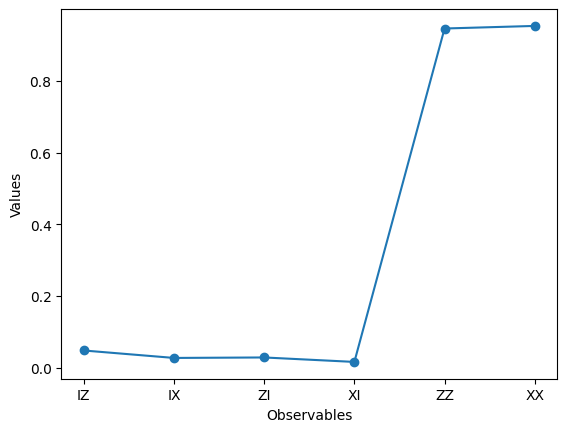

In [8]:
# Plot the result

from matplotlib import pyplot as plt

values = pub_result.data.evs

errors = pub_result.data.stds

# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

큐비트 0과 1의 경우 X와 Z의 독립 기대값은 모두 0이고 상관관계(`XX` 및 `ZZ`)는 1이라는 점에 유의하세요. 이것이 양자 얽힘의 특징입니다.



<span id="scale-to-large-numbers-of-qubits" />

## 대량의 큐비트로 확장하기

양자 컴퓨팅 분야에서 진전을 이루기 위해서는 유틸리티 규모의 작업이 매우 중요합니다. 이러한 작업은 100개 이상의 큐비트와 1000개 이상의 게이트를 사용할 수 있는 회로로 작업하는 등 훨씬 더 큰 규모의 계산을 수행해야 합니다. 이 예는 100-큐비트 GHZ 상태를 생성하고 분석하여 IBM® QPU에서 유틸리티 규모 작업을 수행하는 방법을 보여줍니다.  키스킷 패턴 워크플로우를 사용하며 각 큐비트에 대한 기대값 $\langle Z_0 Z_i \rangle $ 을 측정하는 것으로 끝납니다.

<span id="step-1-map-the-problem" />

### 1단계. 문제 매핑

$n$ -쿼비트 GHZ 상태(본질적으로 확장된 벨 상태)를 준비하는 `QuantumCircuit` 를 반환하는 함수를 작성한 다음, 이 함수를 사용하여 100-쿼비트 GHZ 상태를 준비하고 측정할 관측값을 수집합니다.



In [9]:
from qiskit import QuantumCircuit


def get_qc_for_n_qubit_GHZ_state(n: int) -> QuantumCircuit:
    """This function will create a qiskit.QuantumCircuit (qc) for an n-qubit GHZ state.

    Args:
        n (int): Number of qubits in the n-qubit GHZ state

    Returns:
        QuantumCircuit: Quantum circuit that generate the n-qubit GHZ state, assuming all qubits start in the 0 state
    """
    if isinstance(n, int) and n >= 2:
        qc = QuantumCircuit(n)
        qc.h(0)
        for i in range(n - 1):
            qc.cx(i, i + 1)
    else:
        raise Exception("n is not a valid input")
    return qc


# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
n = 100
qc = get_qc_for_n_qubit_GHZ_state(n)

다음으로 관심 있는 운영자에게 매핑합니다. 이 예에서는 큐비트 사이에 `ZZ` 연산자를 사용하여 큐비트 간 거리가 멀어질 때의 동작을 살펴봅니다.  멀리 떨어진 큐비트 사이의 기대값이 점점 더 부정확해지면 존재하는 노이즈의 수준이 드러납니다.



In [10]:
from qiskit.quantum_info import SparsePauliOp

# ZZII...II, ZIZI...II, ... , ZIII...IZ
operator_strings = [
    "Z" + "I" * i + "Z" + "I" * (n - 2 - i) for i in range(n - 1)
]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator) for operator in operator_strings]

['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

<span id="step-2-optimize-the-problem-for-execution-on-quantum-hardware" />

### 2단계. 양자 하드웨어에서 실행을 위한 문제 최적화

다음 코드는 백엔드의 ISA와 일치하도록 회로와 관측값을 변환합니다. [자격 증명을 이미 저장해 두어야](/docs/guides/cloud-setup) 합니다.



In [11]:
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()

backend = service.least_busy(
    simulator=False, operational=True, min_num_qubits=100
)
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)

isa_circuit = pm.run(qc)
isa_operators_list = [op.apply_layout(isa_circuit.layout) for op in operators]

<span id="step-3-execute-on-hardware" />

### 3단계. 하드웨어에서 실행

작업을 제출하고 [동적 분리라는 오류를 줄이는 기술을 사용하여 오류 억제를 활성화합니다.](../api/qiskit-ibm-runtime/options-dynamical-decoupling-options) 복원력 수준은 오류에 대비하여 얼마나 많은 복원력을 구축할지 지정합니다. 레벨이 높을수록 더 정확한 결과를 생성하지만 처리 시간이 길어지는 단점이 있습니다.  다음 코드에 설정된 옵션에 대한 자세한 설명은 [Qiskit Runtime 에 대한 오류 완화 구성을](/docs/guides/configure-error-mitigation) 참조하세요



In [12]:
from qiskit_ibm_runtime import EstimatorOptions
from qiskit_ibm_runtime import EstimatorV2 as Estimator

options = EstimatorOptions()
options.resilience_level = 1
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

# Create an Estimator object
estimator = Estimator(backend, options=options)

In [13]:
# Submit the circuit to Estimator
job = estimator.run([(isa_circuit, isa_operators_list)])
job_id = job.job_id()
print(job_id)

d2qkqt9olshc73bmb9g0


<span id="step-4-post-process-results" />

### 4단계. 후처리 결과

작업이 완료된 후 결과를 플롯하고 이상적인 시뮬레이션에서는 모두 $\langle Z_0 Z_i \rangle$ 이 1이어야 하지만 $i$ 이 증가함에 따라 $\langle Z_0 Z_i \rangle$ 이 감소하는 것을 확인합니다.



In [14]:
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import QiskitRuntimeService

# data
data = list(range(1, len(operators) + 1))  # Distance between the Z operators
result = job.result()[0]
values = result.data.evs  # Expectation value at each Z operator.
values = [
    v / values[0] for v in values
]  # Normalize the expectation values to evaluate how they decay with distance.

# plotting graph
plt.plot(data, values, marker="o", label="100-qubit GHZ state")
plt.xlabel("Distance between qubits $i$")
plt.ylabel(r"$\langle Z_i Z_0 \rangle / \langle Z_1 Z_0 \rangle $")
plt.legend()
plt.show()

<Image src="/docs/images/tutorials/hello-world/extracted-outputs/de91ebd0-0.svg" alt="Output of the previous code cell" />

이전 플롯은 큐비트 사이의 거리가 증가함에 따라 노이즈의 존재로 인해 신호가 감쇠하는 것을 보여줍니다.



<span id="next-steps" />

## 다음 단계

<Admonition type="tip" title="권장사항">
  *   이 튜토리얼 중 하나를 사용해 보세요:
      *   [VQE를 사용한 하이젠베르크 체인의 기저 상태 에너지 추정](/docs/tutorials/spin-chain-vqe)
      *   [QAOA를](/docs/tutorials/quantum-approximate-optimization-algorithm) 사용하여 최적화 문제 해결
      *   머신 러닝 작업을 위한 [양자 커널](/docs/tutorials/quantum-kernel-training) 모델 훈련
  *   자세한 설치 방법은 [키스킷 설치](/docs/guides/install-qiskit) 가이드에서 확인하세요.
  *   로컬에 키스킷을 설치하지 않으려면 [온라인 개발 환경에서](/docs/guides/online-lab-environments) 키스킷을 사용하는 옵션에 대해 읽어보세요
  *   여러 개의 계정 자격 증명을 저장하거나 다른 계정 옵션을 지정하려면 [로그인 자격 증명 저장하기](/docs/guides/save-credentials#save-your-access-credentials) 가이드의 자세한 안내를 참조하세요.
</Admonition>



© IBM Corp., 2017-2025